In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:

from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [34]:
df = pd.read_csv("Iris.csv")
df.drop(['Id'], axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
features = df.drop("Species", axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

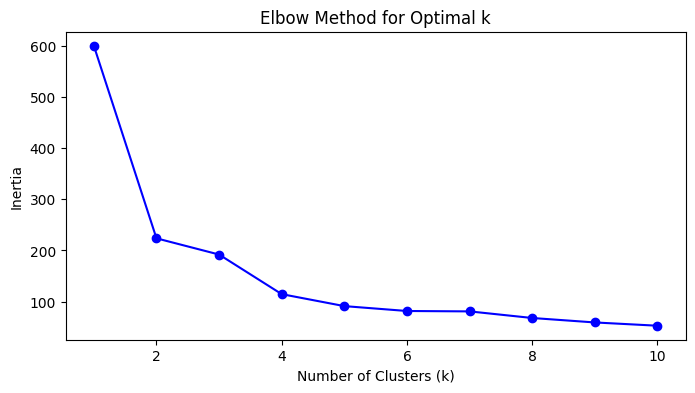

In [38]:
#Elbow Method for Optimal k in K-Means
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

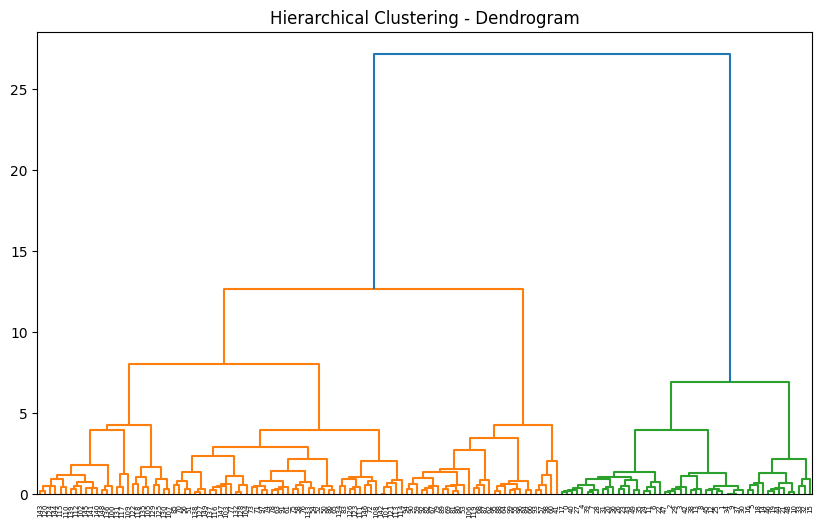

In [40]:
#Dendrogram (Hierarchical Clustering)
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering - Dendrogram")
plt.show()


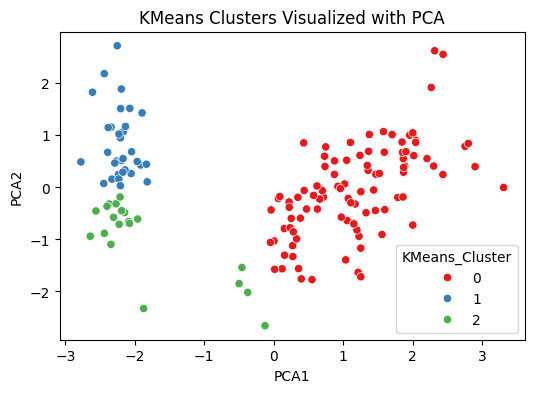

In [43]:
#PCA (Just for Visualizing the Clusters in 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df["PCA1"] = pca_components[:, 0]
df["PCA2"] = pca_components[:, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(x="PCA1", y="PCA2", hue="KMeans_Cluster", data=df, palette="Set1")
plt.title("KMeans Clusters Visualized with PCA")
plt.show()

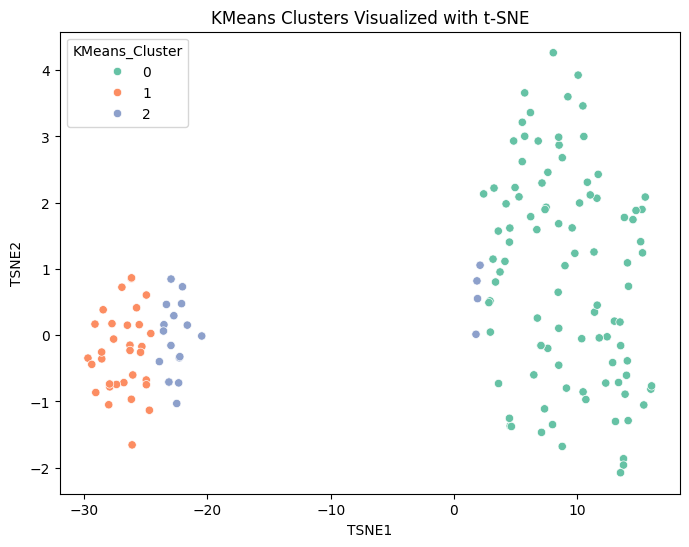

In [45]:
#t-SNE (Another 2D Visual)
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

df["TSNE1"] = tsne_components[:, 0]
df["TSNE2"] = tsne_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="KMeans_Cluster", data=df, palette="Set2")
plt.title("KMeans Clusters Visualized with t-SNE")
plt.show()